In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from skopt import gp_minimize

In [2]:
boston = load_boston()
X, y = boston.data, boston.target
n_features = X.shape[1]

In [ ]:
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

In [3]:
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=5, n_jobs=-1, scoring="neg_mean_absolute_error"))

In [4]:
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=2.8241'

In [5]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1], 
                            res_gp.x[2], res_gp.x[3], 
                            res_gp.x[4]))

Best parameters:
- max_depth=5
- learning_rate=0.114824
- max_features=7
- min_samples_split=2
- min_samples_leaf=1


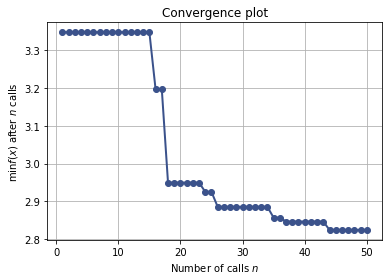

In [6]:
from skopt.plots import plot_convergence

plot_convergence(res_gp);